In [1]:
#https://medium.com/neuronio-br/prevendo-valores-de-a%C3%A7%C3%B5es-com-lstm-b7b3a737aa4
#https://github.com/alexavierc/LSTM-Stock-Prices
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM,Dense
from keras.utils import plot_model
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('csv/report.csv')
df.head()

,casos,data,doenca
0,1,2018-08-23T03:00:00.000Z,Dengue
1,1,2018-09-16T03:00:00.000Z,Dengue
2,1,2018-05-17T03:00:00.000Z,Dengue
3,1,2018-12-05T02:00:00.000Z,Dengue
4,1,2018-11-27T02:00:00.000Z,Dengue


Chikungunya    434
Zika vírus     385
Sífilis        360
Dengue         168
Name: doenca, dtype: int64

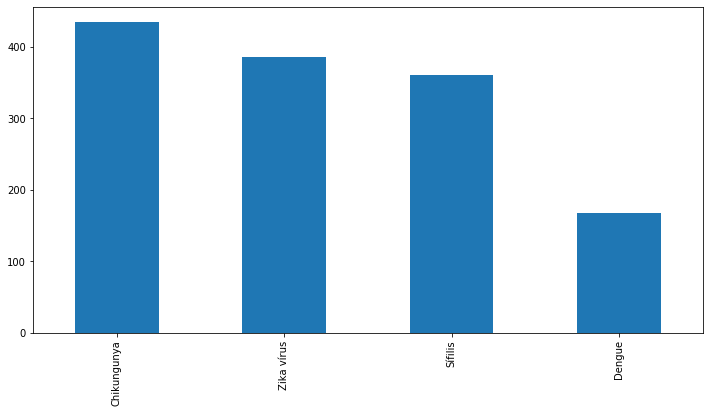

In [4]:
df = pd.read_csv('csv/report.csv')
#df["data"] = df["data"].str.slice(0, 10, 1) 
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)
df = df['doenca'].value_counts(dropna=False)
df.plot.bar(figsize=(12, 6));
#df.plot.line(figsize=(8, 6));
df.head()

In [5]:
df = pd.read_csv('csv/report.csv')
df['data'] = pd.to_datetime(df['data'])
df = df.groupby(['data']).size().to_frame('count').reset_index()
df.set_index('data', inplace=True)

#df.plot.bar(figsize=(10, 6));
df.head()



,count
data,
2017-12-31 02:00:00+00:00,1
2018-01-01 02:00:00+00:00,3
2018-01-02 02:00:00+00:00,3
2018-01-03 02:00:00+00:00,4
2018-01-04 02:00:00+00:00,2


In [6]:
len(df)

462

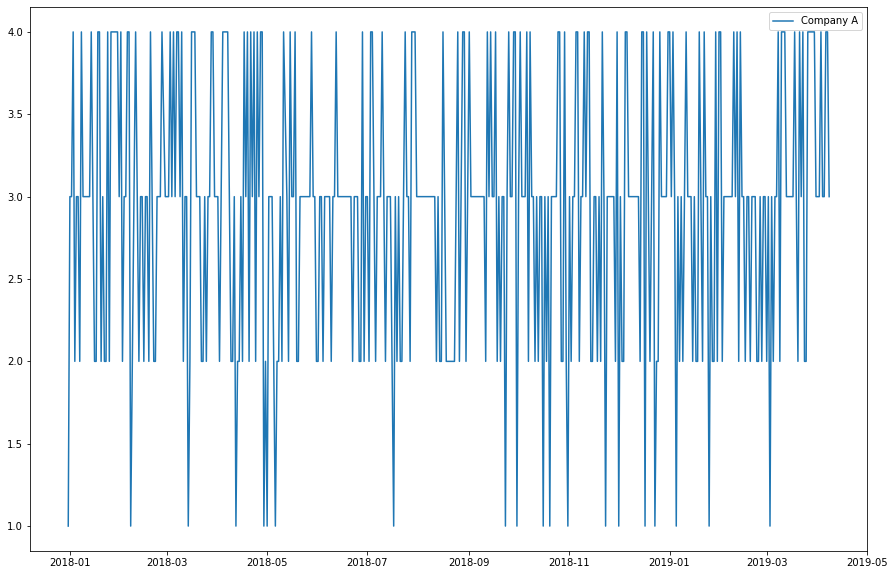

In [7]:
plt.figure(figsize = (15,10))
plt.plot(df, label='Company A')
plt.legend(loc='best')
plt.show()

In [8]:
#Data normalization
array = df.values.reshape(df.shape[0],1)
array[:5]

array([[1],
       [3],
       [3],
       [4],
       [2]], dtype=int64)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.        ],
       [0.66666667],
       [0.66666667],
       [1.        ],
       [0.33333333]])

In [10]:
look_back = 40
forward_days = 10
num_periods = 5

In [11]:
#split in Train and Test
division = len(array) - num_periods*forward_days
array_test = array[division-look_back:]
array_train = array[:division]

In [12]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [13]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(290, 40, 1)
(73, 40, 1)
(5, 40, 1)
(290, 10)
(73, 10)
(5, 10)


In [16]:
#Optionaly, you can load a model
#model = load_model('Trained/single-company/LSTM_compA_LB40_FD10_E50_F50_S30.h5')

In [17]:
#create modal
NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 50

#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 290 samples, validate on 73 samples
Epoch 1/50
 - 17s - loss: 0.1032 - val_loss: 0.0773
Epoch 2/50
 - 15s - loss: 0.0721 - val_loss: 0.0788
Epoch 3/50
 - 17s - loss: 0.0716 - val_loss: 0.0794
Epoch 4/50
 - 16s - loss: 0.0709 - val_loss: 0.0746
Epoch 5/50
 - 15s - loss: 0.0710 - val_loss: 0.0764
Epoch 6/50
 - 16s - loss: 0.0710 - val_loss: 0.0768
Epoch 7/50
 - 16s - loss: 0.0700 - val_loss: 0.0753
Epoch 8/50
 - 16s - loss: 0.0705 - val_loss: 0.0778
Epoch 9/50
 - 16s - loss: 0.0702 - val_loss: 0.0761
Epoch 10/50
 - 15s - loss: 0.0698 - val_loss: 0.0764
Epoch 11/50
 - 15s - loss: 0.0706 - val_loss: 0.0765
Epoch 12/50
 - 15s - loss: 0.0696 - val_loss: 0.0765
Epoch 13/50
 - 16s - loss: 0.0699 - val_loss: 0.0769
Epoch 14/50
 - 15s - loss: 0.0703 - val_loss: 0.0762
Epoch 15/50
 - 16s - loss: 0.0697 - val_loss: 0.0764
Epoch 16/50
 - 16s - loss: 0.0698 - val_loss: 0.0

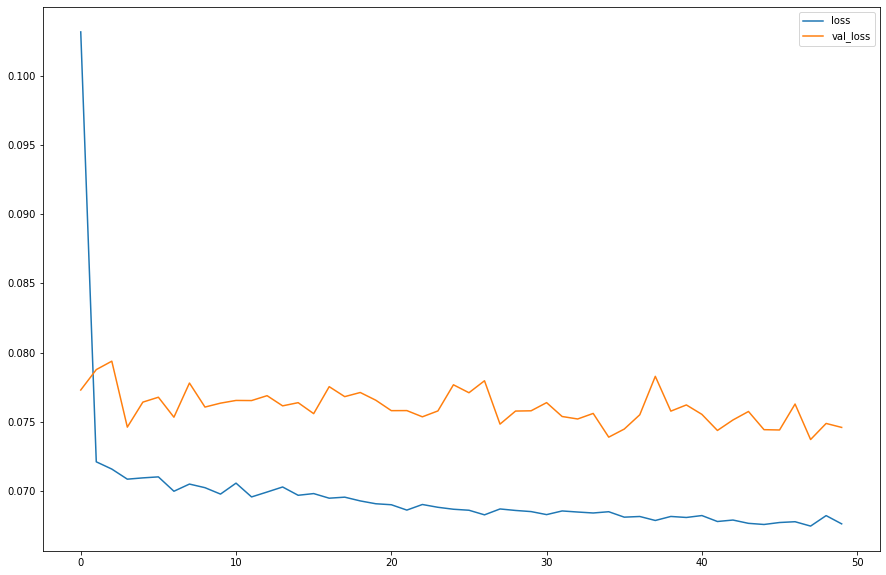

In [18]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [19]:
#Saving the model
file_name = 'model/LSTM_compA_LB{}_FD{}_E{}_F{}_S{}.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `model/LSTM_compA_LB40_FD10_E50_F50_S30.h5` to disk


In [20]:
#Predicting the Test 
Xt = model.predict(X_test)

#print(Xt)

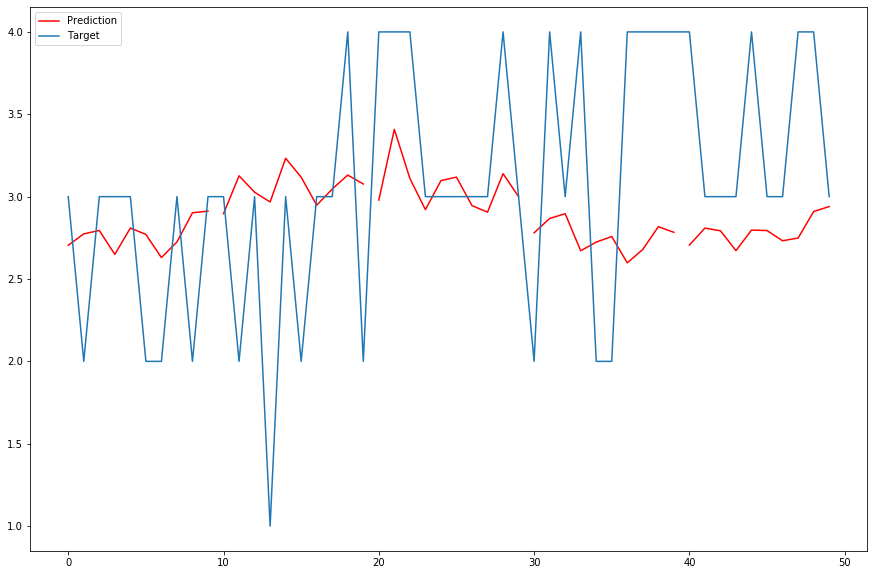

In [21]:
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

In [34]:
#Predicting all the data
division = len(array) - num_periods*forward_days

leftover = division%forward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]

#print(array_train)

[[1.        ]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [1.        ]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [1.        ]
 [0.66666667]
 [0.33333333]
 [0.33333333]
 [1.        ]
 [1.        ]
 [0.33333333]
 [0.66666667]
 [0.33333333]
 [0.33333333]
 [1.        ]
 [0.33333333]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.66666667]
 [1.        ]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.33333333]
 [0.66666667]
 [1.        ]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.33333333]
 [1.        ]
 [0.66666667]
 [0.33333333]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [1.        ]
 [0.66666667]
 [0.66666667]
 [0.66666667]
 [1.        ]
 [0.66666667]
 [1.        ]
 [0.66666667]
 [1.        ]
 [1.        ]
 [0.66666667]
 [1.        ]
 [0.33333333]
 [0.66666667]
 [0.66666667]
 [0.        ]
 [0.33333333]
 [1.  

In [28]:
Xtrain,ytrain = processData(array_train,look_back,forward_days,forward_days)
Xtest,ytest = processData(array_test,look_back,forward_days,forward_days)

In [29]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [30]:
y = np.concatenate((ytrain, ytest), axis=0)

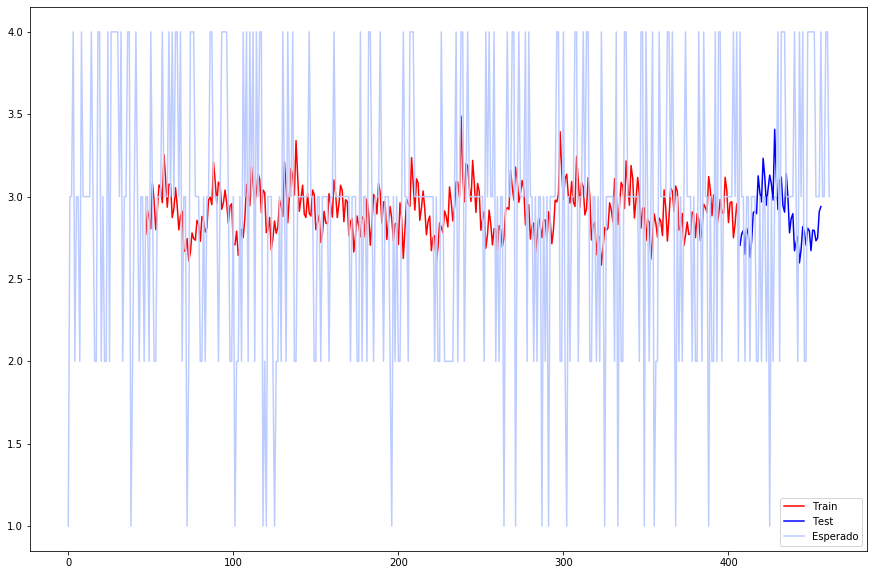

In [31]:
plt.figure(figsize = (15,10))

# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')
# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='b', label='Test')

#Data used
#plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')

#Initial data. It should overlap the data used
plt.plot(scl.inverse_transform(array), color='#BDCCFF', label='Esperado')

plt.legend(loc='best')
plt.show()